![data-x](http://oi64.tinypic.com/o858n4.jpg)

---
# Notebook Lecture 4: Linear Regression

**Author list:** Alexander Fred Ojala

**References / Sources:** 
* http://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/ml/ML-Exercise1.ipynb 
* Sebastian Raschka, Python Machine Learning
* http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr05.html (data)

**License Agreement:** Feel free to do whatever you want with this code

___

*This notebook highlights the basic ML concepts: Simple linear regression, multiple linear regression, and linear predicition. With OLS closed analytical solution, (batch) gradient descent, and scikit-learn.*

## Linear Regression & Prediction
___


Linear Regression is a type of supervised learning, where we have a continuous output (target variable) Y. In Linear Regression we try to model linear relationships between variables. It assumes that the dependence between Y and the feature(s) X is linear.



|Learning \ Data|Continuous|Categorical|
|---|---|---|
|**Supervised**|**regression**|classification|
|**Unsupervised**|dimension reduction|clustering|



Creating a Linear Regression model allows us to predit future values of the target variable Y given new input data X.

The best linear predictor is obtained when the error function is minimized according to some criteria (e.g., to minimize the residual sum of squares).

The linear regression model fits a continuous linear function to a set of data points. For simple linear regression (where we have one feature and one target variable) we can assume a model like: 

$Y = \beta_0 + \beta_1 X$



where,

* $\beta_0$ is the intercept
* $\beta_1$ the slope parameter

* $Y$ is the dependent variable (sometimes called "target variable" or "response variable")

* $X$ is the independent variable (sometimes called "predictor", "regressor", or "feature")

This can be compared to the equation of a straight line (i.e., the linear equation): $y = kx + m$


## Simple Linear Regression: Goal

We want to calculate estimates of the intercept parameter and the slope parameter, i.e. 
$\hat{\beta_0}$ and $\hat{\beta_1}$

in order to estimate the target variable 
$\hat{y} = \hat{\beta_0} + \hat{\beta_0} x$

.

## <center> Descriptive picture </center>



<img src="regression.png" width="450">

<center>(source: Sebastian Raschka)</center>

## Implement Linear Regression model in Python
#### Using OLS (Ordinary Least Squares) closed form solution

# Simple Linear Regression - Analytical solution (one predictor)

In [39]:
#import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

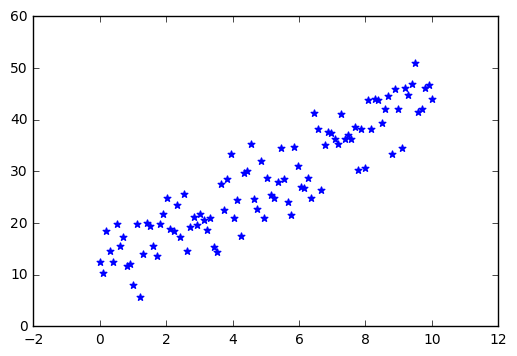

In [40]:
N = 100 # number of samples

err=np.random.randn(N)*5 # add an error term to the target variable

x1=np.linspace(0,10,N) # N evenly distributed points from 0-10

y=12+x1*3.5+err # intercept = beta0 = 12, slope = beta1 = 3.5

# plot
fig, ax = plt.subplots()
ax.scatter(x1,y,color='b',s=25,marker="*")

In [41]:
ones = np.ones(N) # values for the intercept

x = np.column_stack((ones,x1)) # create N x 2 matrix for X
print 'x:\n',x[:10,:],'\n'

print 'y:\n',y[:10]

x:
[[ 1.          0.        ]
 [ 1.          0.1010101 ]
 [ 1.          0.2020202 ]
 [ 1.          0.3030303 ]
 [ 1.          0.4040404 ]
 [ 1.          0.50505051]
 [ 1.          0.60606061]
 [ 1.          0.70707071]
 [ 1.          0.80808081]
 [ 1.          0.90909091]] 

y:
[ 12.4992422   10.41711922  18.43110371  14.62114855  12.54674919
  19.73209618  15.52989146  17.21828785  11.7352941   11.99886153]


## Closed form analytical solution - OLS (Ordinary Least Squares)
**Calculate** $W = (X^TX)^{-1}X^TY$

$ W = W_1 W_2 = (\hat{\beta}_0, \hat{\beta}_1)$

$ W_1 = (X^TX)^{-1}$

$ W_2 = X^TY$

In [42]:
def ols(x,y):
    W1 = np.linalg.inv(np.dot(x.T,x))
    W2 = np.dot(x.T,y)
    W = np.dot(W1,W2)
    return W

W = ols(x,y)

[beta0,beta1] = W


print '[beta0, beta1]','=', W #weights is ['beta0','beta1']




[beta0, beta1] = [ 11.27433971   3.37311901]


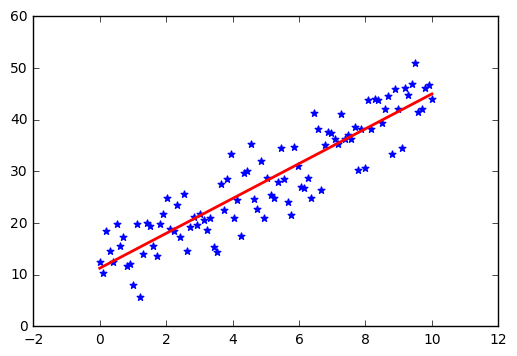

In [43]:
ax.plot(x1,beta0+beta1*x1,linewidth=2,color='red')
fig

## Multiple Linear Regression

Multiple Linear regression handles multiple features (x variables).

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 ... + \beta_nx_n$

**We can use the same solution as above to analytically solve the OLS equation:**

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3$

In [44]:
x_1 = np.random.randn(N)*2
x_2 = np.random.randn(N)*5
x_3 = np.random.randn(N)*0.2

y_1 = 5 + 3*x_1 + 8*x_2 + 1*x_3

x = np.column_stack([np.ones(N),x_1,x_2,x_3]) # Extend x matrix

W_mult = ols(x,y_1)

print '[beta0, beta1, beta2, beta3] = ',W_mult

[beta0, beta1, beta2, beta3] =  [ 5.  3.  8.  1.]


# (Batch) Gradient Descent optimization for Linear Regression

Many times the analytical solution to the Linear Regression problem is not easy to obtain (because it is computationally complex to invert large matrix). Also if the requirment $\det (X^TX) \neq 0$ does not hold:


Then, instead we can implement a cost function called the **Residual Sum of Squares:**

$$RSS = J(W) = \frac{1}{2} \sum^N_i ( y_i - W^T X_i )$$

where $X_i$ is row i of the X matrix. Each element in X is labeled as $ x_{i,j}$

.

We would like to **minimize the RSS by choosing the best weights**:

$$W = [\beta_0, \beta_1, \beta_2, ..., \beta_N]$$



Because the **RSS is convex** we can do this by taking the partial derivative of the RSS with regards to the weights:

$$ \frac{\partial J}{\partial \beta_j} = - \sum^N_i (y_i - W^T X_i) \cdot x_{i,j}$$

The weigth change in every iteration of the batch gradient descent algorithm is defined to be:

$$ \Delta \beta_j = -\eta \frac{\partial J}{\partial \beta_j}$$

$$\Delta W = - \eta \nabla J ( W )$$

where $\eta$ is the learning rate. This gives us the updating rule for every iteration as

$$W_{new} = W_{old} + \Delta W $$

In [45]:
'''
Source: Sebastian Raschka, Python Machine Learning

Define a class that will be the model object
eta = learning rate
n_iter = number of iterations
'''


class lr_model(object):
    '''
    VARIABLES:
    eta = learning rate
    n_iter = number of updates
    self.w_ = weights (initialized at 0)
    self.cost_ = cost function values (should be minimized). Sum of Squared Residuals
    output = prediction in every phase
    errors = true value - predicted value
    
    FUNCTIONS
    fit = fits the model with optimal weights
    net_input = calculates predicted value
    predict = runs net_input once - runt it when the model is trained
    
    '''

    def __init__(self, eta=0.0001, n_iter=10000):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)
    
lr = lr_model(n_iter=3000)
X = x1[:, np.newaxis]
lr.fit(X, y)

print 'OLS: [beta0_ols, beta1_ols] =', W
print 'Gradient descent: [beta0, beta1] =',lr.w_

OLS: [beta0_ols, beta1_ols] = [ 11.27433971   3.37311901]
Gradient descent: [beta0, beta1] = [ 11.26824957   3.37403472]


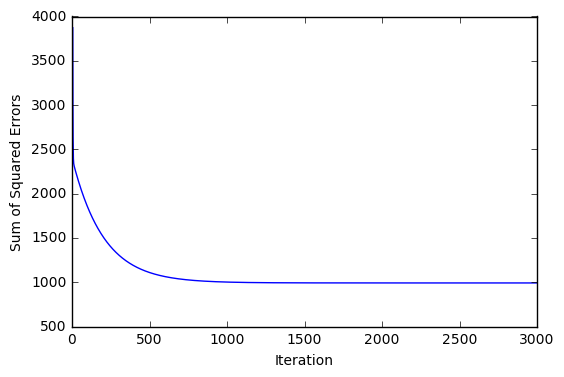

In [46]:
plt.plot(range(5, lr.n_iter+1), lr.cost_[4:])
plt.ylabel('Sum of Squared Errors')
plt.xlabel('Iteration')
plt.show()

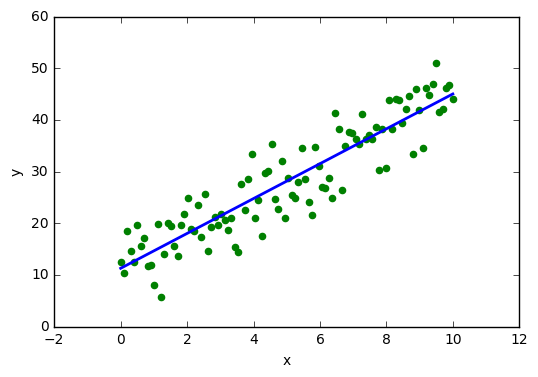

In [47]:

plt.scatter(X, y, color='green')
plt.plot(X, lr.predict(X), color='blue', linewidth=2)    

plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Linear Regression - Reading in Data

In [48]:
#import data Fires per 10000 housing units and Thefts per 10000 population in Chicago

import os
path = os.getcwd() + '/data2.csv'
df = pd.read_csv(path, header=None, names=['Fires', 'Thefts']) #read in to table and add header
df.head()
data=df/10 #normalize data
df=df/10
df.insert(0, 'Ones', 1) # Insert ones for intercept

In [49]:
df.head()

,Ones,Fires,Thefts
0,1,0.62,2.9
1,1,0.95,4.4
2,1,1.05,3.6
3,1,0.77,3.7
4,1,0.86,5.3


# OLS

Matrix multiplication Linear Regression to obtain the weights

$ W = (X^T X)^{-1} X^T Y $

$ W_1 = (X^T X)^{-1} $

$ W_2 = X^T Y $

In [50]:
#def lm_weights(df):

n=len(df) #number of rows
m=len(df.iloc[0,:])
df_matrix = df.as_matrix()
nx = df_matrix[:,0:(m-1)]
ny = df_matrix[:,m-1]
ny = ny[:,np.newaxis] # add new axis for matrix multiplication

W1 = np.linalg.inv(np.dot(nx.T,nx)) #Calculate first part of weight
W2 = np.dot(nx.T,ny)
W = np.dot(W1,W2)

weights_df = pd.DataFrame(W,index=['beta0','beta1'])

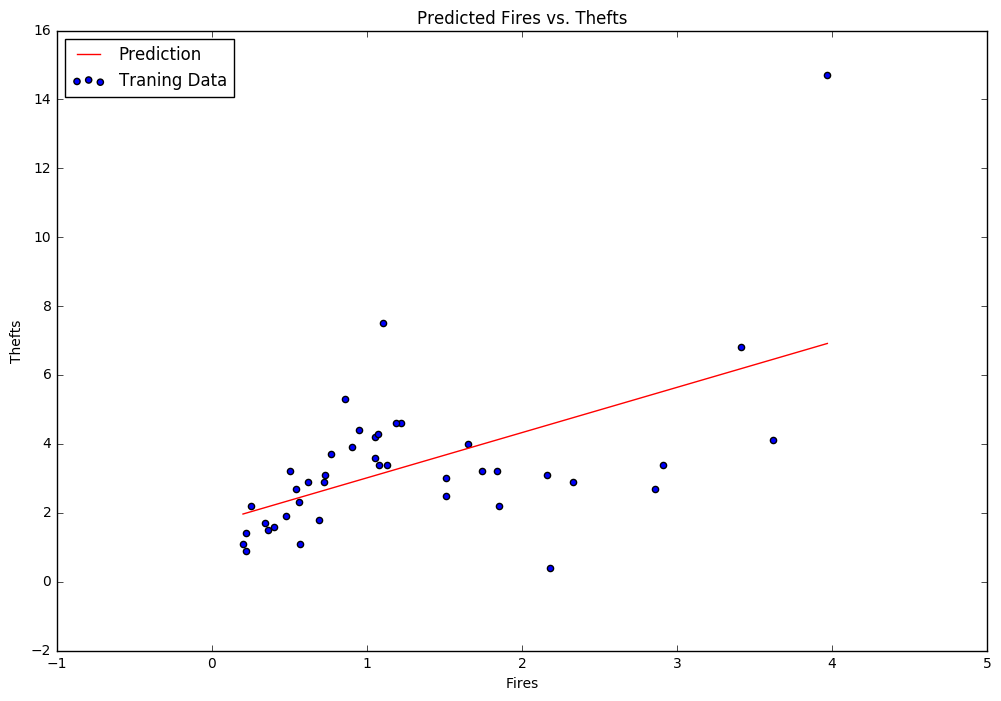

In [51]:
# Plot Results

x = np.linspace(data.Fires.min(), data.Fires.max(), 100)
f = W[0, 0] + (W[1, 0] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Fires, data.Thefts, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Fires')
ax.set_ylabel('Thefts')
ax.set_title('Predicted Fires vs. Thefts')

# Gradient descent

Now let's do some variable initialization.

In [52]:
# set X (training data) and y (target variable)
cols = df.shape[1]
X = df.iloc[:,1:cols-1]
y = df.iloc[:,cols-1:cols]

Let's take a look to make sure X (training set) and y (target variable) look correct.

In [53]:
X.head()

,Fires
0,0.62
1,0.95
2,1.05
3,0.77
4,0.86


In [54]:
y.head()

,Thefts
0,2.9
1,4.4
2,3.6
3,3.7
4,5.3


In [55]:
X = np.matrix(X.values)
y = np.matrix(y.values)
beta = np.matrix(np.array([0,0]))

Let's take a quick look at the shape of our matrices.

In [56]:
print X.shape, beta.shape, y.shape
y = np.squeeze(np.asarray(y)) # to get rid of the column dimension
X = np.squeeze(np.asarray(X))
print y.shape
print X.shape

(42, 1) (1, 2) (42, 1)
(42,)
(42,)


Now let's perform the gradient descent method from above

In [57]:
lr_new = lr_model(eta=0.01,n_iter=1000)

lr.fit(X[:,np.newaxis],y)

print 'last cost', lr.cost_[-1]

weights = lr.w_

last cost 75.7756286735


# Now let's plot

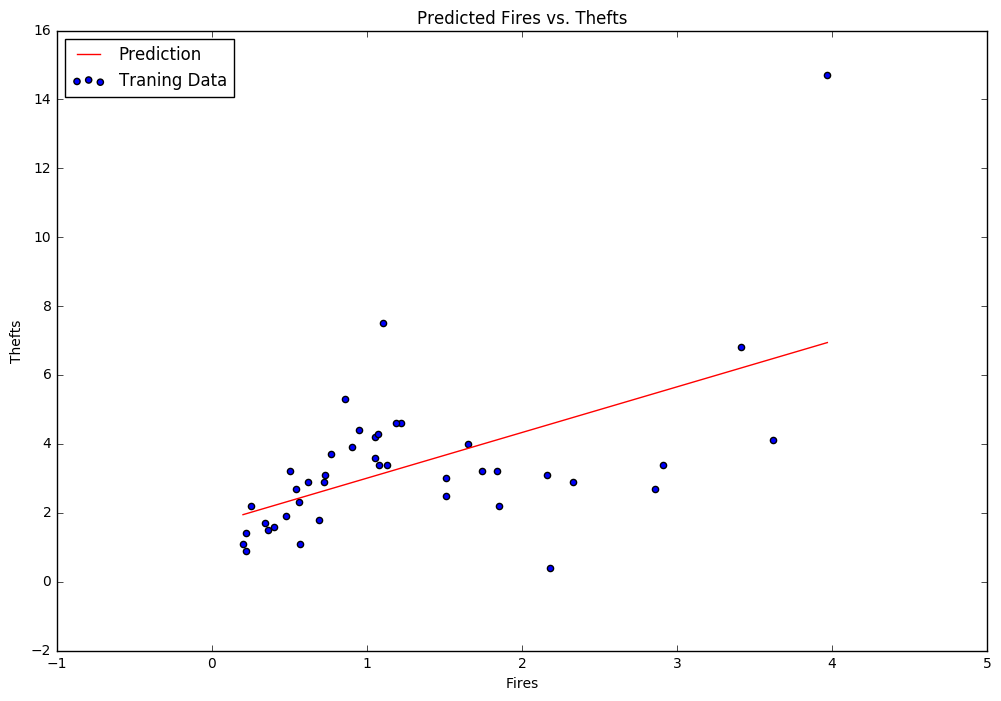

In [58]:
x = np.linspace(data.Fires.min(), data.Fires.max(), 100)
f = weights[0] + (weights[1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Fires, data.Thefts, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Fires')
ax.set_ylabel('Thefts')
ax.set_title('Predicted Fires vs. Thefts')
plt.show()

Looks pretty good! Since the gradient decent function also outputs a vector with the cost at each training iteration, we can plot that as well. Notice that the cost always decreases - this is an example of a convex optimization problem.

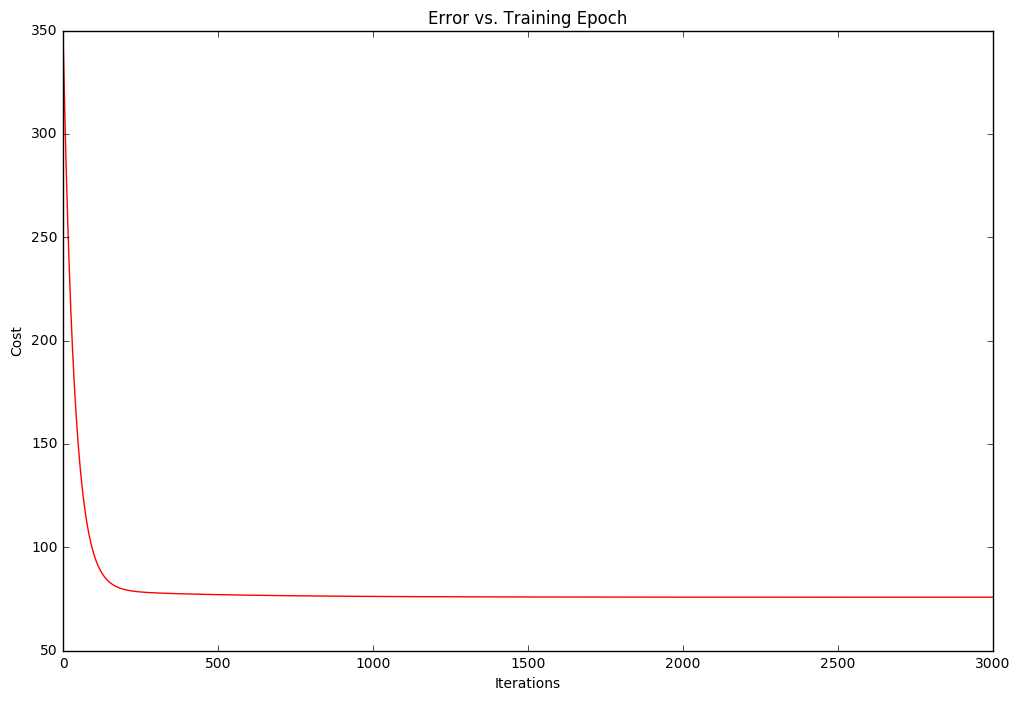

In [59]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(lr.n_iter), lr.cost_, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

# Scikit-Learn 
## Linear Regression

In [60]:
print X.shape
x = X.reshape(-1,1) # x must have a column axis
print x.shape

(42,)
(42, 1)


In [61]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Here's what the scikit-learn model's predictions look like.

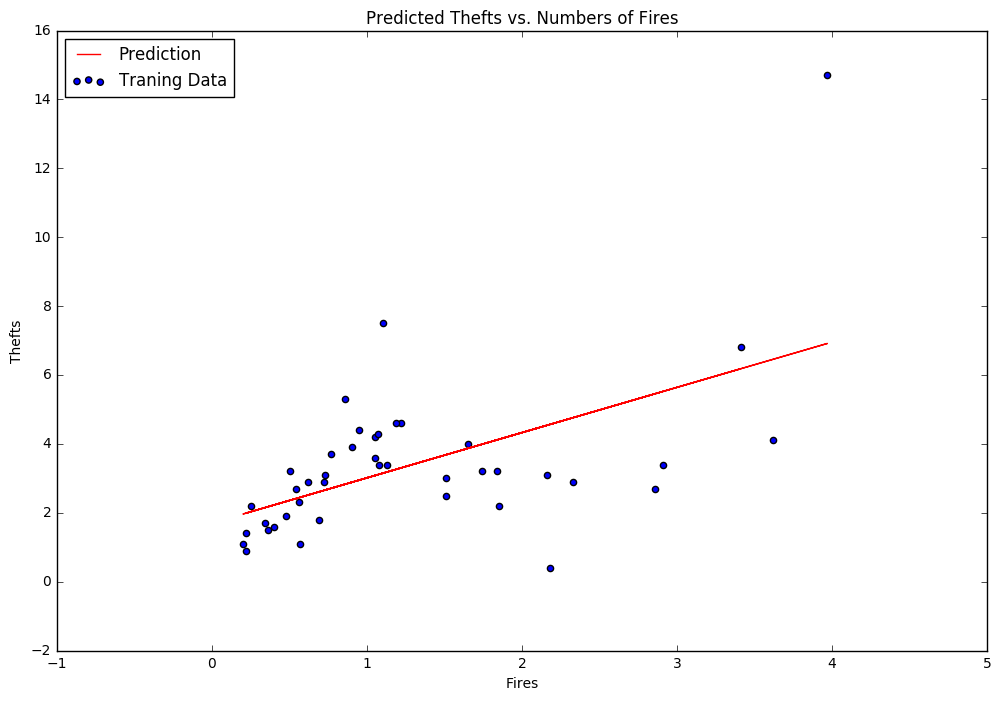

In [62]:

f = model.predict(x).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Fires, data.Thefts, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Fires')
ax.set_ylabel('Thefts')
ax.set_title('Predicted Thefts vs. Numbers of Fires')